# Spracovanie textu v Pythone

NLTK (http://www.nltk.org/)

Gensim (https://radimrehurek.com/gensim/tutorial.html)

### Nástroje (mimo Pythonu)

Stanford CoreNLP (https://stanfordnlp.github.io/CoreNLP/; rozhranie aj cez NLTK)

Apache OpenNLP (https://opennlp.apache.org/)

WordNet (https://wordnet.princeton.edu/; rozhranie cez NLTK)

# NLTK

http://www.nltk.org/book/

In [1]:
import nltk

In [2]:
from nltk.corpus import inaugural

In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [4]:
inaugural.words('1789-Washington.txt')

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [5]:
len(inaugural.words('1789-Washington.txt'))

1538

In [6]:
inaugural.sents('1789-Washington.txt')

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [7]:
texts = []
for fileid in inaugural.fileids():
    year = fileid[:4]
    name = fileid[5:].split('.')[0]
    text = ' '.join(inaugural.words(fileid))
    texts.append({'name': name, 'year': year, 'text': text})

In [8]:
texts[0]

{'name': 'Washington',
 'text': 'Fellow - Citizens of the Senate and of the House of Representatives : Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order , and received on the 14th day of the present month . On the one hand , I was summoned by my Country , whose voice I can never hear but with veneration and love , from a retreat which I had chosen with the fondest predilection , and , in my flattering hopes , with an immutable decision , as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination , and of frequent interruptions in my health to the gradual waste committed on it by time . On the other hand , the magnitude and difficulty of the trust to which the voice of my country called me , being sufficient to awaken in the wisest and most experienced of her citizens a distrustfu

## Tokenizácia

In [9]:
text = texts[0]['text']

In [10]:
sentences = nltk.sent_tokenize(text)

In [11]:
sentences[:5]

['Fellow - Citizens of the Senate and of the House of Representatives : Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order , and received on the 14th day of the present month .',
 'On the one hand , I was summoned by my Country , whose voice I can never hear but with veneration and love , from a retreat which I had chosen with the fondest predilection , and , in my flattering hopes , with an immutable decision , as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination , and of frequent interruptions in my health to the gradual waste committed on it by time .',
 'On the other hand , the magnitude and difficulty of the trust to which the voice of my country called me , being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qua

In [12]:
sent = sentences[0]

In [13]:
tokens = nltk.word_tokenize(sent)

In [14]:
tokens

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.']

## Stemming

Stemming vráti korene slov. Napr. *ryba -> ryb*

In [15]:
porter = nltk.PorterStemmer()

In [16]:
[porter.stem(token) for token in tokens]

['fellow',
 '-',
 'citizen',
 'of',
 'the',
 'senat',
 'and',
 'of',
 'the',
 'hous',
 'of',
 'repres',
 ':',
 'among',
 'the',
 'vicissitud',
 'incid',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'fill',
 'me',
 'with',
 'greater',
 'anxieti',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notif',
 'wa',
 'transmit',
 'by',
 'your',
 'order',
 ',',
 'and',
 'receiv',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.']

## Lematizácia

Lematizácia prevádza slová na ich základný slovníkový tvar. Napr. *rybe -> ryba*

In [17]:
wnl = nltk.WordNetLemmatizer()

In [18]:
[wnl.lemmatize(token) for token in tokens]

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitude',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxiety',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'wa',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.']

## Part-of-Speech Tagging

In [19]:
tagged = nltk.pos_tag(tokens)
tagged

[('Fellow', 'NNP'),
 ('-', ':'),
 ('Citizens', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Senate', 'NNP'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('House', 'NNP'),
 ('of', 'IN'),
 ('Representatives', 'NNPS'),
 (':', ':'),
 ('Among', 'IN'),
 ('the', 'DT'),
 ('vicissitudes', 'NNS'),
 ('incident', 'NN'),
 ('to', 'TO'),
 ('life', 'NN'),
 ('no', 'DT'),
 ('event', 'NN'),
 ('could', 'MD'),
 ('have', 'VB'),
 ('filled', 'VBN'),
 ('me', 'PRP'),
 ('with', 'IN'),
 ('greater', 'JJR'),
 ('anxieties', 'NNS'),
 ('than', 'IN'),
 ('that', 'DT'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('the', 'DT'),
 ('notification', 'NN'),
 ('was', 'VBD'),
 ('transmitted', 'VBN'),
 ('by', 'IN'),
 ('your', 'PRP$'),
 ('order', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('received', 'VBD'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('14th', 'JJ'),
 ('day', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('present', 'JJ'),
 ('month', 'NN'),
 ('.', '.')]

In [20]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [21]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


## Menné entity

In [22]:
entities = nltk.chunk.ne_chunk(tagged)

In [23]:
print(entities.__repr__())

Tree('S', [Tree('GPE', [('Fellow', 'NNP')]), ('-', ':'), ('Citizens', 'NNS'), ('of', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Senate', 'NNP')]), ('and', 'CC'), ('of', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('House', 'NNP')]), ('of', 'IN'), ('Representatives', 'NNPS'), (':', ':'), ('Among', 'IN'), ('the', 'DT'), ('vicissitudes', 'NNS'), ('incident', 'NN'), ('to', 'TO'), ('life', 'NN'), ('no', 'DT'), ('event', 'NN'), ('could', 'MD'), ('have', 'VB'), ('filled', 'VBN'), ('me', 'PRP'), ('with', 'IN'), ('greater', 'JJR'), ('anxieties', 'NNS'), ('than', 'IN'), ('that', 'DT'), ('of', 'IN'), ('which', 'WDT'), ('the', 'DT'), ('notification', 'NN'), ('was', 'VBD'), ('transmitted', 'VBN'), ('by', 'IN'), ('your', 'PRP$'), ('order', 'NN'), (',', ','), ('and', 'CC'), ('received', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('14th', 'JJ'), ('day', 'NN'), ('of', 'IN'), ('the', 'DT'), ('present', 'JJ'), ('month', 'NN'), ('.', '.')])


## N-gramy

In [24]:
tokens = nltk.word_tokenize(text)

In [25]:
bigrams = list(nltk.bigrams(tokens))
bigrams[:5]

[('Fellow', '-'),
 ('-', 'Citizens'),
 ('Citizens', 'of'),
 ('of', 'the'),
 ('the', 'Senate')]

In [26]:
nltk.FreqDist(bigrams).most_common(10)

[(('of', 'the'), 20),
 ((',', 'and'), 15),
 (('to', 'the'), 11),
 (('in', 'the'), 9),
 ((',', 'I'), 7),
 ((',', 'in'), 7),
 (('which', 'the'), 6),
 (('which', 'I'), 6),
 (('by', 'the'), 6),
 (('for', 'the'), 6)]

In [27]:
stopwords = nltk.corpus.stopwords.words('english')

In [28]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
tokens_cleared = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]

In [30]:
tokens_cleared[:10]

['fellow',
 'citizens',
 'senate',
 'house',
 'representatives',
 'among',
 'vicissitudes',
 'incident',
 'life',
 'event']

In [31]:
nltk.FreqDist(nltk.bigrams(tokens_cleared)).most_common(10)

[(('fellow', 'citizens'), 3),
 (('house', 'representatives'), 2),
 (('united', 'states'), 2),
 (('good', 'assure'), 2),
 (('free', 'government'), 2),
 (('executive', 'department'), 2),
 (('american', 'people'), 2),
 (('public', 'good'), 2),
 (('citizens', 'senate'), 1),
 (('senate', 'house'), 1)]

In [32]:
nltk.FreqDist(nltk.trigrams(tokens_cleared)).most_common(10)

[(('fellow', 'citizens', 'senate'), 1),
 (('citizens', 'senate', 'house'), 1),
 (('senate', 'house', 'representatives'), 1),
 (('house', 'representatives', 'among'), 1),
 (('representatives', 'among', 'vicissitudes'), 1),
 (('among', 'vicissitudes', 'incident'), 1),
 (('vicissitudes', 'incident', 'life'), 1),
 (('incident', 'life', 'event'), 1),
 (('life', 'event', 'could'), 1),
 (('event', 'could', 'filled'), 1)]

## WordNet

* Lexikálna databáza
* Obsahuje synsety
  * Podstatné mená, slovesá, prídavné mená, príslovky
* Prepojenia medzi synsetmi
  * Antonymá, hyperonymá, hyponymá, holonymá, meronymá


In [33]:
from nltk.corpus import wordnet as wn

In [34]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [35]:
car = wn.synset('car.n.01')

In [36]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [37]:
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [38]:
car.examples()

['he needs a car to get to work']

In [39]:
car.hyponyms()

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [40]:
car.hypernyms()

[Synset('motor_vehicle.n.01')]

In [41]:
car.part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

In [42]:
wn.synsets('black')[0].lemmas()[0].antonyms()

[Lemma('white.n.02.white')]

# Reprezentácia textu

Textový dokument väčšinou reprezentujeme pomocou množiny slov (angl. *bag-of-words*) = vektorom. Zložky vektoru predstavujú jednotlivé slová, resp. n-gramy zo slovníka (pre celý korpus/jazyk). Hodnotou zložiek vektora môže byť:

* početnosť
* frekvencia
* váhovaná frekvencia

Slová s vysokou frekvenciou výskytu v jazyku (spojky a pod.) sa označujú ako tzv. *stop slová* a zvyknú sa pri predspracovaní odstraňovať.

## TF-IDF

Term frequency * inverse document frequency

`TF` – frekvencia slova v aktuálnom dokumente

`IDF` – záporný logaritmus pravdepodobnosti výskytu slova v dokumente (rovnaká pre všetky dokumenty)

Rôzne varianty (váhovacie schémy): https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Gensim

Knižnica na modelovanie tém v dokumentoch.

Implementuje TF-IDF, LSA, pLSA, LDA, HDP, DTM, word2vec

https://radimrehurek.com/gensim/tutorial.html

In [43]:
from gensim import corpora, models, similarities

C:\Users\robom\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [44]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    return [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]

In [45]:
tokenized_docs = [preprocess_text(text['text']) for text in texts]

In [46]:
tokenized_docs[4][:10]

['proceeding',
 'fellow',
 'citizens',
 'qualification',
 'constitution',
 'requires',
 'entrance',
 'charge',
 'conferred',
 'duty']

Odstránenie slov, ktoré sa v korpuse vyskytujú len raz

In [47]:
from collections import defaultdict

frequency = defaultdict(int)
for text in tokenized_docs:
    for token in text:
        frequency[token] += 1

tokenized_docs = [[token for token in doc if frequency[token] > 1] for doc in tokenized_docs]

In [48]:
dictionary = corpora.Dictionary(tokenized_docs)

In [49]:
#print(dictionary.token2id)

In [50]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

Trénovanie TF-IDF modelu

In [51]:
tfidf_model = models.TfidfModel(corpus)

In [52]:
tfidf_corpus = tfidf_model[corpus]

In [53]:
tfidf_corpus[0][:10]

[(0, 0.028010090497208276),
 (1, 0.07085344594214385),
 (2, 0.04749339521031525),
 (3, 0.015511844798307405),
 (4, 0.04137634383884512),
 (5, 0.028010090497208276),
 (6, 0.05611489489049448),
 (7, 0.06223194626196463),
 (8, 0.025148643506526666),
 (9, 0.03663159017738751)]

Ďalšie modely: LSI, LDA, ...

Môžeme vypočítať podobnosť výsledných vektorov:

In [54]:
index = similarities.MatrixSimilarity(tfidf_corpus)

In [55]:
index[tfidf_corpus[0]]

array([0.99999994, 0.05204535, 0.11806069, 0.10361628, 0.08821429,
       0.11326972, 0.08443201, 0.13961926, 0.11418307, 0.13363883,
       0.12441207, 0.10547448, 0.13012546, 0.16001716, 0.11614959,
       0.11807807, 0.12322758, 0.1193403 , 0.09294098, 0.04349447,
       0.05975523, 0.06178577, 0.1137971 , 0.0716081 , 0.10576563,
       0.09300245, 0.08222347, 0.09069102, 0.06769612, 0.02679328,
       0.08959054, 0.06768762, 0.07814044, 0.067146  , 0.08975255,
       0.06536622, 0.05937269, 0.04135488, 0.05134605, 0.03186388,
       0.04473033, 0.07292005, 0.03711684, 0.0621645 , 0.04236317,
       0.04424392, 0.0487093 , 0.0367588 , 0.04386257, 0.04083951,
       0.04396403, 0.04307514, 0.04092164, 0.04443119, 0.04516653,
       0.06448399], dtype=float32)

## word2vec

Každé slovo má naučený vektor reálnych čísel, ktoré reprezentujú rôzne jeho vlastnosti a zachytávajú viaceré lingvistické pravidelnosti. Môžeme počítať podobnosť medzi slovami ako podobnosť dvoch vektorov.

vector('Paris') - vector('France') + vector('Italy') ~= vector('Rome')

vector('king') - vector('man') + vector('woman') ~= vector('queen')

https://radimrehurek.com/gensim/models/word2vec.html

https://medium.com/@mishra.thedeepak/word2vec-in-minutes-gensim-nlp-python-6940f4e00980

In [56]:
from nltk.corpus import brown

In [57]:
sentences = brown.sents()
model = models.Word2Vec(sentences, min_count=1)

In [58]:
model.save('brown_model')

In [59]:
model = models.Word2Vec.load('brown_model')

In [60]:
print(model.most_similar("mother"))

[('father', 0.9839912056922913), ('husband', 0.9664338827133179), ('wife', 0.948773205280304), ('friend', 0.9356204271316528), ('son', 0.9287860989570618), ('nickname', 0.920671820640564), ('eagle', 0.9159242510795593), ('addiction', 0.9114930629730225), ('voice', 0.9061123132705688), ('patient', 0.9007025957107544)]


C:\Users\robom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [61]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


C:\Users\robom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


In [62]:
print(model.doesnt_match("pizza pasta garden fries".split()))

garden


C:\Users\robom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


In [63]:
model['human']

C:\Users\robom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.32851714, -0.5722134 ,  0.2640201 ,  0.06305841, -0.50917286,
        0.42538497,  0.49471816,  0.11713734, -0.12409685, -0.96000934,
       -0.62186366,  0.27898213, -0.1227291 ,  0.37111375, -0.7279464 ,
       -1.07922   , -0.61395663,  0.12079396,  0.9613495 , -0.5477146 ,
        0.98108023,  0.10888717,  0.04988907, -0.03757172,  0.8942429 ,
        0.08468171, -0.9169274 , -0.5566276 ,  1.0099053 , -0.7024809 ,
       -0.86486053,  0.9793606 ,  1.1177942 , -0.1891863 , -0.5618871 ,
        0.23572737, -0.02830363,  0.3850419 ,  0.07886671, -1.2316335 ,
       -0.48184946, -0.7577164 , -0.10174472,  0.27908903,  0.29583973,
        0.70918393,  1.0229721 ,  0.31862622, -0.15582532,  0.29903924,
       -0.554896  , -0.97671187, -0.24920607,  0.2622542 , -1.4362781 ,
       -0.27151567,  0.17132913,  0.44869515,  0.14991249,  0.7898575 ,
       -0.2948771 ,  0.70900524, -0.4459506 , -0.42801845,  0.0403171 ,
       -0.7466154 , -0.20586845,  0.12062318,  0.2231294 , -0.08

## Extrakcia čŕt pomocou scikit-learn

http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
docs = [text['text'] for text in texts]

In [66]:
vectorizer = CountVectorizer(stop_words='english')
tf = vectorizer.fit_transform(docs)

In [67]:
tf.toarray()[0][:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
vectorizer.get_feature_names()[:100]

['000',
 '100',
 '120',
 '125',
 '13',
 '14th',
 '15th',
 '16',
 '1774',
 '1776',
 '1778',
 '1780',
 '1787',
 '1789',
 '1790',
 '1800',
 '1801',
 '1812',
 '1815',
 '1816',
 '1817',
 '1818',
 '1826',
 '1850',
 '1861',
 '1868',
 '1873',
 '1880',
 '1886',
 '1890',
 '1893',
 '1896',
 '1897',
 '1898',
 '1899',
 '18th',
 '1907',
 '1917',
 '1933',
 '1941',
 '1945',
 '1963',
 '1972',
 '1980',
 '1984',
 '19th',
 '20',
 '200',
 '200th',
 '20th',
 '21st',
 '225',
 '25',
 '30',
 '30th',
 '3d',
 '41',
 '48',
 '4th',
 '50',
 '50th',
 '60',
 '67',
 '6th',
 'abandon',
 'abandoned',
 'abandonment',
 'abate',
 'abdicated',
 'abeyance',
 'abhorring',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abnormal',
 'abode',
 'abodes',
 'abolish',
 'abolished',
 'abolishing',
 'aboriginal',
 'aborigines',
 'abound',
 'abounding',
 'abounds',
 'abraham',
 'abreast',
 'abridging',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing']

In [69]:
transformer = TfidfVectorizer(stop_words='english')
tfidf = transformer.fit_transform(docs)

In [70]:
tfidf.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05753266, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Úlohy

1. Vypíšte 10 najčastejších slov z inaugaračných prejavov amerických prezidentov (pre každý prejav zvlášť).
2. Pozrite sa na slová s najväčšou váhou podľa TF-IDF; vypíšte pre každý prejav 10 slov s najväčšou váhou. Zmenil sa nejak výsledok oproti prvej úlohe?
3. Ktoré dva prejavy sa navzájom najviac podobajú?
4. Ako sa menila frekvencia slov `america` a `citizen` v priebehu rokov v týchto prejavoch? (Hint: Ak si neviete rady, pozrite sem: https://www.nltk.org/book/ch02.html. Analogicky môžete zobraziť v grafe priebeh iných slov, ktoré vás zaujímajú.)
5. Na zautomatizovanie a sprehľadnenie predspracovania (ale aj ďalších krokov analýzy dát) sa v Pythone používajú tzv. [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Pozrite si, ako pipeliny fungujú: http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html. Na základe toho prerobte predspracovanie textov (inauguračných prejavov) pomocou pipeliny; budete mať samostatný transformer na tokenizáciu slov (funkcia `preprocess_text` tu v notebooku), odstránenie málopočetných tokenov, prevod textu na vektory a váhovanie pomocou TF-IDF. 

### Úloha 1

In [71]:
[(text['name'], text['year'], nltk.FreqDist(doc).most_common(10)) for text, doc in zip(texts, tokenized_docs)]

[('Washington',
  '1789',
  [('every', 9),
   ('government', 8),
   ('public', 6),
   ('may', 6),
   ('citizens', 5),
   ('present', 5),
   ('country', 5),
   ('one', 4),
   ('ought', 4),
   ('duty', 4)]),
 ('Washington',
  '1793',
  [('shall', 3),
   ('oath', 2),
   ('fellow', 1),
   ('citizens', 1),
   ('called', 1),
   ('upon', 1),
   ('voice', 1),
   ('country', 1),
   ('execute', 1),
   ('functions', 1)]),
 ('Adams',
  '1797',
  [('people', 20),
   ('government', 16),
   ('may', 13),
   ('nations', 11),
   ('country', 10),
   ('nation', 9),
   ('states', 9),
   ('foreign', 8),
   ('constitution', 8),
   ('honor', 7)]),
 ('Jefferson',
  '1801',
  [('government', 12),
   ('us', 10),
   ('may', 8),
   ('fellow', 7),
   ('citizens', 7),
   ('let', 7),
   ('shall', 6),
   ('principle', 6),
   ('would', 6),
   ('one', 6)]),
 ('Jefferson',
  '1805',
  [('public', 14),
   ('citizens', 10),
   ('may', 10),
   ('fellow', 8),
   ('state', 8),
   ('us', 7),
   ('among', 7),
   ('shall', 7),
 

### Úloha 2

In [72]:
sorted_docs = [sorted(doc, key=lambda x: x[1], reverse=True)[:10] for doc in tfidf_corpus]

In [73]:
[(text['name'], text['year'], [(dictionary[token[0]], token[1]) for token in doc]) for text, doc in zip(texts, sorted_docs)]

[('Washington',
  '1789',
  [('immutable', 0.1417068918842877),
   ('impressions', 0.1417068918842877),
   ('providential', 0.1417068918842877),
   ('qualifications', 0.12446389252392925),
   ('peculiarly', 0.11222978978098896),
   ('article', 0.10274028245807375),
   ('deliberations', 0.10274028245807375),
   ('pecuniary', 0.10274028245807375),
   ('rendered', 0.10274028245807375),
   ('retreat', 0.10274028245807375)]),
 ('Washington',
  '1793',
  [('incurring', 0.29078917480634237),
   ('violated', 0.29078917480634237),
   ('willingly', 0.29078917480634237),
   ('injunctions', 0.25540573305194114),
   ('knowingly', 0.25540573305194114),
   ('previous', 0.25540573305194114),
   ('witnesses', 0.25540573305194114),
   ('besides', 0.23030078160031686),
   ('reposed', 0.21082786841270343),
   ('thereof', 0.21082786841270343)]),
 ('Adams',
  '1797',
  [('pleasing', 0.2077367578449058),
   ('houses', 0.15580256838367934),
   ('legislatures', 0.15580256838367934),
   ('virtuous', 0.129636834

### Úloha 3

In [74]:
sims = [(i, sorted(enumerate(index[doc]), key=lambda x: x[1], reverse=True)[1]) for i, doc in enumerate(tfidf_corpus)]
sims

[(0, (13, 0.16001716)),
 (1, (24, 0.059558876)),
 (2, (13, 0.19778861)),
 (3, (13, 0.15785694)),
 (4, (14, 0.20050159)),
 (5, (9, 0.18124631)),
 (6, (8, 0.12052809)),
 (7, (8, 0.31789652)),
 (8, (7, 0.31789652)),
 (9, (14, 0.26348448)),
 (10, (7, 0.18040511)),
 (11, (14, 0.19067594)),
 (12, (13, 0.27118456)),
 (13, (12, 0.27118456)),
 (14, (9, 0.26348448)),
 (15, (13, 0.18537056)),
 (16, (12, 0.24375957)),
 (17, (14, 0.2573405)),
 (18, (13, 0.21943015)),
 (19, (18, 0.08848246)),
 (20, (27, 0.14170362)),
 (21, (27, 0.12883462)),
 (22, (23, 0.20237121)),
 (23, (25, 0.21776198)),
 (24, (26, 0.20919083)),
 (25, (27, 0.25594592)),
 (26, (24, 0.20919083)),
 (27, (30, 0.26122516)),
 (28, (27, 0.21100071)),
 (29, (33, 0.13494636)),
 (30, (27, 0.26122516)),
 (31, (32, 0.14396647)),
 (32, (31, 0.14396647)),
 (33, (34, 0.19519448)),
 (34, (35, 0.21484832)),
 (35, (34, 0.21484832)),
 (36, (33, 0.1475563)),
 (37, (33, 0.16710341)),
 (38, (54, 0.20881313)),
 (39, (50, 0.11799169)),
 (40, (35, 0.1766

In [75]:
list(map(lambda x: (texts[x[0]]['name'], (texts[x[1][0]]['name'], x[1][1])), sims))

[('Washington', ('Harrison', 0.16001716)),
 ('Washington', ('Cleveland', 0.059558876)),
 ('Adams', ('Harrison', 0.19778861)),
 ('Jefferson', ('Harrison', 0.15785694)),
 ('Jefferson', ('Polk', 0.20050159)),
 ('Madison', ('Adams', 0.18124631)),
 ('Madison', ('Monroe', 0.12052809)),
 ('Monroe', ('Monroe', 0.31789652)),
 ('Monroe', ('Monroe', 0.31789652)),
 ('Adams', ('Polk', 0.26348448)),
 ('Jackson', ('Monroe', 0.18040511)),
 ('Jackson', ('Polk', 0.19067594)),
 ('VanBuren', ('Harrison', 0.27118456)),
 ('Harrison', ('VanBuren', 0.27118456)),
 ('Polk', ('Adams', 0.26348448)),
 ('Taylor', ('Harrison', 0.18537056)),
 ('Pierce', ('VanBuren', 0.24375957)),
 ('Buchanan', ('Polk', 0.2573405)),
 ('Lincoln', ('Harrison', 0.21943015)),
 ('Lincoln', ('Lincoln', 0.08848246)),
 ('Grant', ('McKinley', 0.14170362)),
 ('Grant', ('McKinley', 0.12883462)),
 ('Hayes', ('Garfield', 0.20237121)),
 ('Garfield', ('Harrison', 0.21776198)),
 ('Cleveland', ('Cleveland', 0.20919083)),
 ('Harrison', ('McKinley', 0.2

Riešenie by sa mohlo ešte vylepšiť - ignorovali sme len podobnosť daného príhovoru so samým sebou, ale mohli by sme odfiltrovať iný príhovor od rovnakého prezidenta (preto teraz máme napr. *Clinton - Clinton*). Ďalšia možnosť je pozerať sa pre daného prezidenta vždy len do minulosti, ak by nás zaujímalo, či sa niekým inšpirovali (*Kennedy sa nemohol inšpirovať Reaganom*).

### Úloha 4

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [77]:
years = [text['year'] for text in texts]
print(years)

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']


In [78]:
def plot_freq(docs, targets):
    cdf = nltk.ConditionalFreqDist(
        (target, year) 
        for year, doc in docs
        for w in doc 
        for target in targets 
        if w.startswith(target))
    cdf.plot()

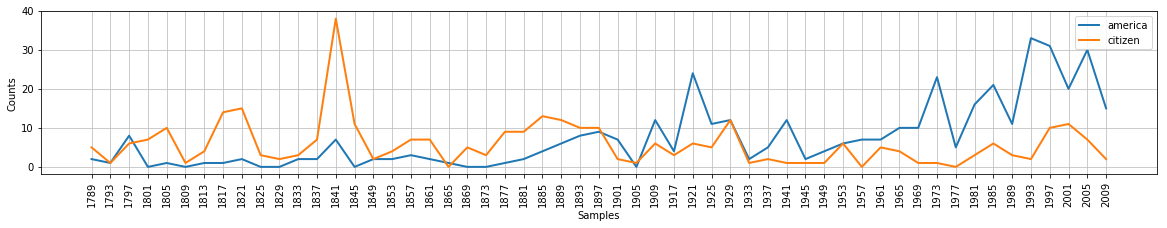

In [90]:
plot_freq(zip(years, tokenized_docs), ['america', 'citizen'])

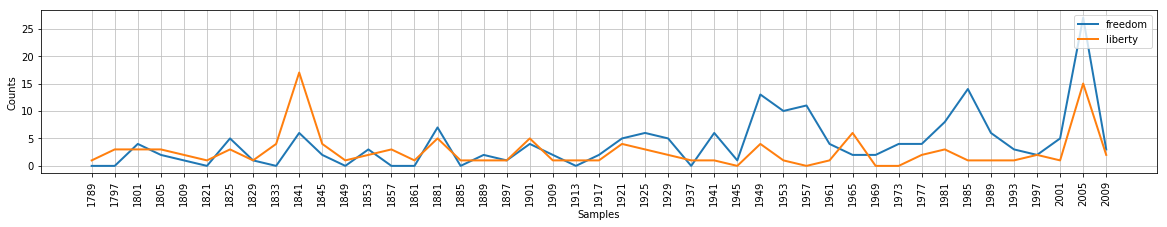

In [91]:
plot_freq(zip(years, tokenized_docs), ['liberty', 'freedom'])

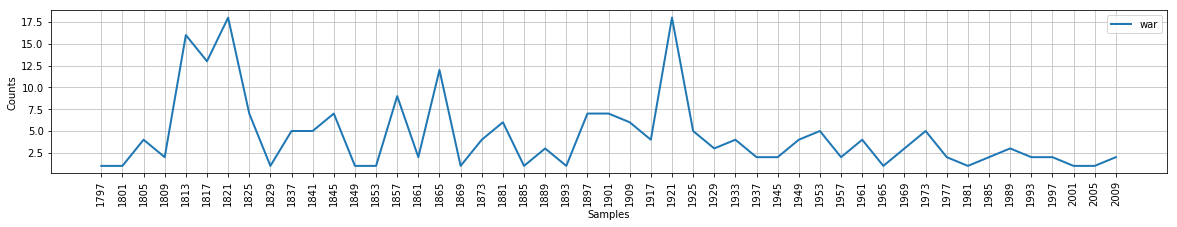

In [92]:
plot_freq(zip(years, tokenized_docs), ['war'])

### Úloha 5

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [83]:
class TextPreprocessor(TransformerMixin):
    def __init__(self, tokenizer, stopwords):
        self.tokenizer = tokenizer
        self.stopwords = stopwords
    
    def preprocess(self, doc):
        tokenized = self.tokenizer(doc)
        return [token.lower() for token in tokenized if token.isalpha() and token.lower() not in self.stopwords]
    
    def fit(self, docs, y=None, **fit_params):
        return self
    
    def transform(self, docs, **transform_params):
        return [self.preprocess(doc) for doc in docs]

In [84]:
from collections import defaultdict

class CorpusTransformer(TransformerMixin):
    def __init__(self, min_freq=1):
        self.min_freq = min_freq
        self.dictionary = None
    
    def filter_tokens(self, docs):
        frequency = defaultdict(int)
        for doc in docs:
            for token in doc:
                frequency[token] += 1
        
        return [[token for token in doc if frequency[token] > 1] for doc in docs]
        
    def fit(self, docs, y=None, **fit_params):
        self.dictionary = corpora.Dictionary(self.filter_tokens(docs))
        return self
    
    def transform(self, docs, **transform_params):
        return [self.dictionary.doc2bow(doc) for doc in docs]

In [85]:
class TfIdfTransformer(TransformerMixin):
    def __init__(self):
        self.model = None
        
    def fit(self, docs, y=None, **fit_params):
        self.model = models.TfidfModel(docs)
        return self
    
    def transform(self, docs, **transform_params):
        return self.model[docs]

In [86]:
ppl = Pipeline([
    ('preprocess', TextPreprocessor(nltk.word_tokenize, nltk.corpus.stopwords.words('english'))),
    ('to_corpus', CorpusTransformer()),
    ('tfidf', TfIdfTransformer())
])

In [87]:
transformed_corpus = ppl.fit_transform([text['text'] for text in texts])

In [88]:
transformed_corpus[0][:10]

[(0, 0.028010090497208276),
 (1, 0.07085344594214385),
 (2, 0.04749339521031525),
 (3, 0.015511844798307405),
 (4, 0.04137634383884512),
 (5, 0.028010090497208276),
 (6, 0.05611489489049448),
 (7, 0.06223194626196463),
 (8, 0.025148643506526666),
 (9, 0.03663159017738751)]